# Risk and Return on Investment in The 10 Biggest Technology Companies in The World & Predictions For The Future

<p> In investment, we all want it will return more money than it costs. But, every investment always be risky - there may be a range of possible outcomes. How does one compare different instrument investments that may deliver similar results on average, but exhibit "**different levels of risks**"? </p>

<p><img style="float: left ; margin: 5px 20px 1px 1px;" width="250" src="sharpe.jpg"></p>

### Introduce Professor William F. Sharpe

<p> He introduced the "<a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><em>Reward-to-Variability Ratio</em></a>" theory in 1964 which is currently known as the "Sharpe Ratio".</p>
<p> This theory compares the expected return of two investment opportunities and calculates the additional return per unit of risk that an investor could earn by choosing one over the other. In simple terms, this theory looks at the difference in returns of two investments and compares the difference in the mean to the standard deviation (as a measure of risk) of these differences. A higher Sharpe ratio means that the reward will be higher for a given amount of risk.</p>
<p>The Sharpe ratio is one of the most popular risk/return measures in finance because of its ease of use. Toeri has also led Professor Sharpe to win the Nobel Prize in Economics in 1990 for his work on the capital asset pricing model (CAPM)</p>

*"Capital Asset Prices: A Theory of Market Equilibrium under Conditions of Risk (1964)"*

<p>The Sharpe ratio is usually calculated for a portfolio using the risk-free interest rate as a benchmark. However, here we will use stocks instead of portfolios. We will also use stock indices as a benchmark rather than risk-free interest rates because they are both available on a daily frequency (more real-time).</p>

<p>So let's try to find out about the Sharpe ratio of <a href="https://companiesmarketcap.com/tech/largest-tech-companies-by-market-cap/"><em>The 10 Biggest Technology Companies shares</em></a>. As a benchmark, we will use the S&P 500 which measures the performance of 500 largest shares in the US.</p>

### Import Package and Set Enviroment

In [1]:
#import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
#from turtle import color

#set appearance
sns.set_style('whitegrid')
sns.set_context("notebook")
plt.rcParams['figure.figsize'] = [15, 7]
%matplotlib inline

### Download 10 Big Tech Companies Stock Price from Yahoo! Finance's API

<p> Based on <a href="https://companiesmarketcap.com/tech/largest-tech-companies-by-market-cap/"><em>Companiesmarketcap Website</em></a>, The world's top 10 technology companies are : </p>

- Apple (USA)
- Microsoft (USA)
- Google (USA)
- Amazon (USA)
- Tesla (USA)
- Meta Platforms (USA)
- Taiwan Semiconductor Manufacturing Company (Taiwan)
- Tencent (China)
- Nvidia (USA)
- Alibaba (China)

<p> Here we will use stock prices from the past 5 years. </p>

In [2]:
#List of Top 10 Tech Company
company_list = ['AAPL','MSFT','GOOG','AMZN','TSLA','META','TSM','TCEHY','NVDA','BABA']

#Set start and end of stock price that will download
end = datetime.now()
start = datetime(end.year-5,end.month,end.day)

#Loop download for every stock price
for stock in company_list:
  globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<p>To facilitate the observation process, all stock price dataframes will be combined based on the ticker symbol and replaced with the company name.</p>

In [3]:
#put all dataframe to list
data = [AAPL,MSFT,GOOG,AMZN,TSLA,META,TSM,TCEHY,NVDA,BABA]

#Company name
company_name = ['Apple','Microsoft','Google','Amazon','Tesla','Meta','TSMC','Tencent','Nvidia','Alibaba']

#add column "company_name" to every company stock price dataframe
for company, com_name in zip(data,company_name):
  company["Company Name"] = com_name

#convert list to pandas dataframe
df = pd.concat(data,axis=0).sort_index()
df

,Open,High,Low,Close,Adj Close,Volume,Company Name
Date,,,,,,,
2017-09-05,40.937500,41.062500,40.139999,40.520000,38.456131,117874000,Apple
2017-09-05,73.339996,73.889999,72.980003,73.610001,69.167618,21556000,Microsoft
2017-09-05,48.770000,48.838501,48.018501,48.263500,48.263500,57664000,Amazon
2017-09-05,23.586666,23.699333,23.059334,23.306000,23.306000,57526500,Tesla
2017-09-05,171.270004,172.389999,169.550003,170.720001,170.720001,13210900,Meta
...,...,...,...,...,...,...,...
2022-09-02,111.339996,111.675003,108.129997,108.680000,108.680000,20601600,Google
2022-09-02,261.700012,264.739990,254.470001,256.059998,256.059998,22841600,Microsoft
2022-09-02,159.750000,160.360001,154.970001,155.809998,155.809998,76905200,Apple


### Daily Closing Price
<p> The dataframe above shows the stock price at the time of opening, high, low, closing, adjusted closing, and daily trading volume. But, we only need adjusted closing price column for every company stock. So, we will create a pivot table for slicing adj close for each company every day.</p>

In [4]:
#Create Pivot table
stock = pd.pivot_table(df,values='Adj Close',index='Date',columns='Company Name')
stock

Company Name,Alibaba,Amazon,Apple,Google,Meta,Microsoft,Nvidia,TSMC,Tencent,Tesla
Date,,,,,,,,,,
2017-09-05,169.919998,48.263500,38.456131,46.422501,170.720001,69.167618,41.053200,32.222633,40.321808,23.306000
2017-09-06,168.139999,48.389999,38.415798,46.390499,172.089996,68.970306,41.028465,32.589893,41.139469,22.968666
2017-09-07,170.479996,48.973499,38.261570,46.797501,173.210007,69.853569,41.218987,32.825996,40.784821,23.374001
2017-09-08,169.000000,48.294998,37.637558,46.325001,170.949997,69.515297,40.503883,32.791023,40.213436,22.893333
2017-09-11,174.059998,48.897999,38.318520,46.453999,173.509995,70.248222,41.817799,33.088329,42.085205,24.246000
...,...,...,...,...,...,...,...,...,...,...
2022-08-29,96.599998,129.789993,161.380005,110.339996,159.169998,265.230011,158.009995,82.849998,40.750000,284.820007
2022-08-30,93.839996,128.729996,158.910004,109.910004,157.160004,262.970001,154.679993,82.790001,40.000000,277.700012
2022-08-31,95.410004,126.769997,157.220001,109.150002,162.929993,261.470001,150.940002,83.349998,41.299999,275.609985


### Visualization & Summarize Daily Stock Price

<p>Let's visualize all data stock price in one graph, so we better understand what we're dealing with.</p>

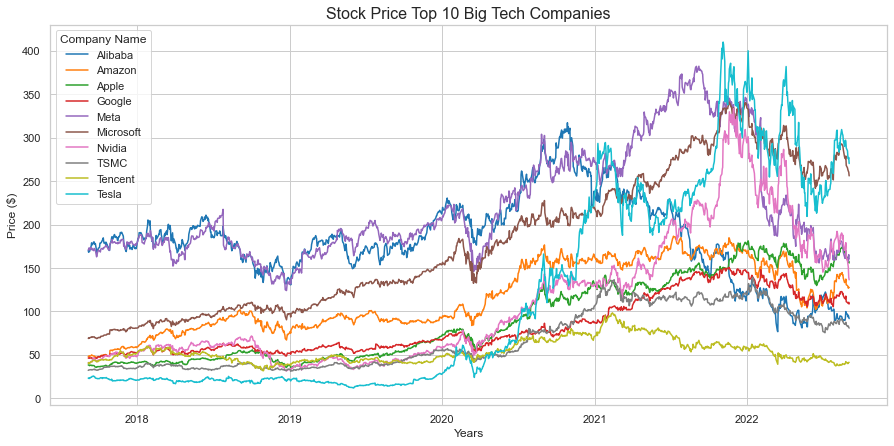

In [5]:
#Create Plot
sns.lineplot(data=stock,dashes=False)
plt.title('Stock Price Top 10 Big Tech Companies',size=16)
plt.xlabel('Years')
plt.ylabel('Price ($)')
plt.show()

#### Highest Stock Price Right Now

In [6]:
highest = stock.tail(1).sort_values(by=stock.index[-1],ascending=False,axis=1)
display(highest)

print(f'Here, we can see {highest.columns[0]}, {highest.columns[1]} and {highest.columns[2]} have the highest stock price right now.')
print('But, will the 3 companies provide the highest returns as well?')

Company Name,Tesla,Microsoft,Meta,Apple,Nvidia,Amazon,Google,Alibaba,TSMC,Tencent
Date,,,,,,,,,,
2022-09-02,270.209991,256.059998,160.320007,155.809998,136.470001,127.510002,108.68,91.800003,80.900002,41.419998


Here, we can see Tesla, Microsoft and Meta have the highest stock price right now.
But, will the 3 companies provide the highest returns as well?


### S&P 500 as Benchmark

In [7]:
#Download S&P 500 Stock Price
SP500 = yf.download('^GSPC',start,end)

#Slicing S&P 500 Dataframe for only Adjusted close column
benchmark = SP500.filter(['Adj Close'])
benchmark

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2017-09-05,2457.850098
2017-09-06,2465.540039
2017-09-07,2465.100098
2017-09-08,2461.429932
2017-09-11,2488.110107
...,...
2022-08-29,4030.610107
2022-08-30,3986.159912
2022-08-31,3955.000000


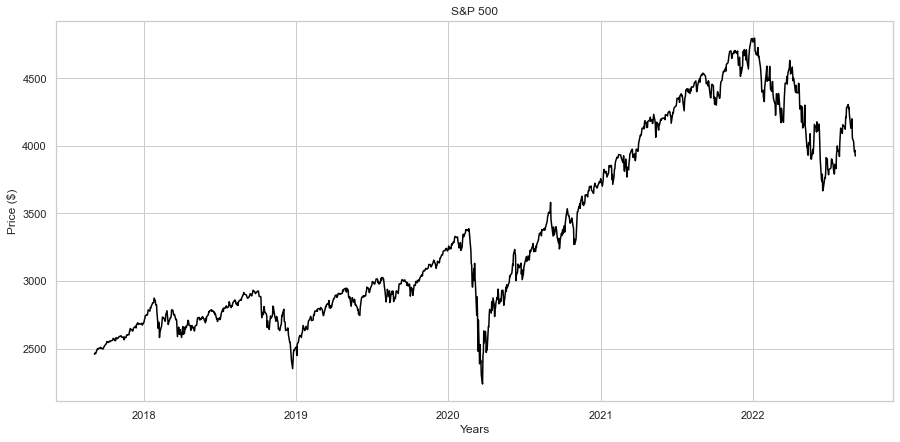

In [8]:
#Plot Bencmark
sns.lineplot(x='Date',y='Adj Close',data=benchmark,color='Black')
plt.title('S&P 500')
plt.xlabel('Years')
plt.ylabel('Price ($)')
plt.show()

### Calculate The Daily Return of Price Stock

The Sharpe ratio uses the difference in returns of all considered investment opportunities.

However, our data show the daily price of each investment, not the daily return. To calculate the daily return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio.

#### Daily Stock Return

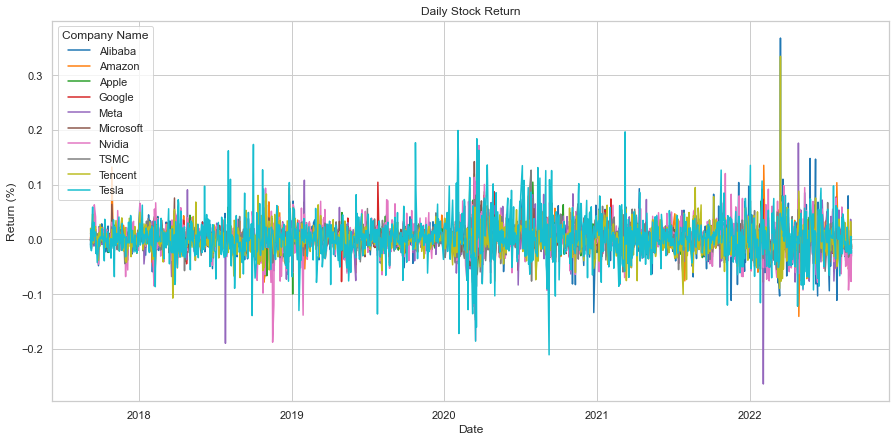

In [9]:
#Calculating daily returns from daily stock price changes
stock_return = stock.pct_change()

#Plot daily returns
sns.lineplot(data=stock_return,dashes=False)
plt.title('Daily Stock Return')
plt.ylabel('Return (%)')
plt.show()

#### Daily Benchmark Return

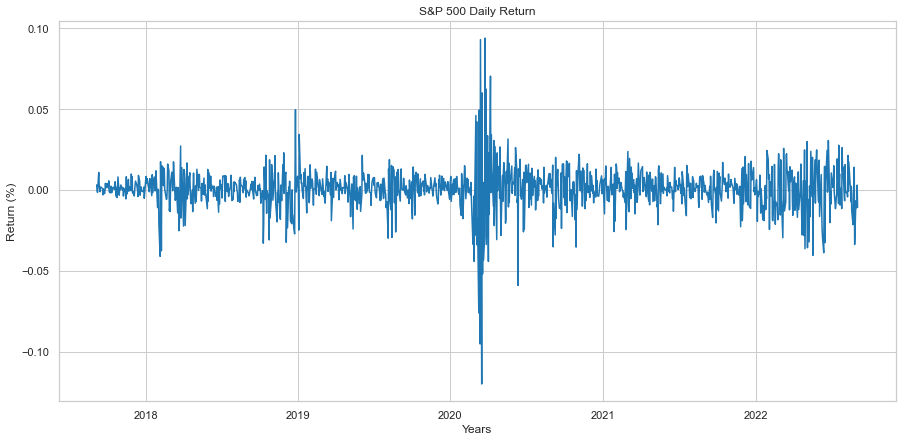

In [25]:
#Calculating daily returns from daily benchmark price changes
benchmark_return = benchmark['Adj Close'].pct_change()

#Plot daily returns
sns.lineplot(data=benchmark_return,dashes=False)
plt.title('S&P 500 Daily Return')
plt.xlabel('Years')
plt.ylabel('Return (%)')
plt.show()

### Calculating Excess Returns for All Companies with S&P 500

<p>Next, we need to calculate the relative performance of all stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between <code>Stock return</code> and <code>Benchmark return</code> for each day.</p>

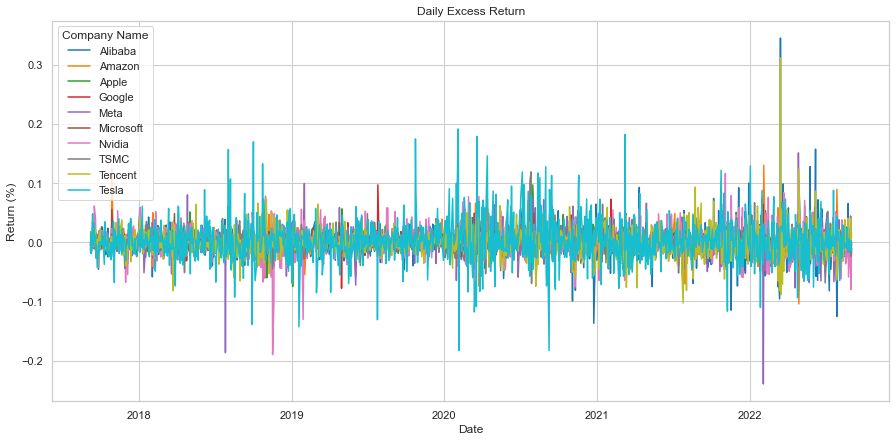

Company Name,Alibaba,Amazon,Apple,Google,Meta,Microsoft,Nvidia,TSMC,Tencent,Tesla
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,-0.000548,0.000547,0.000859,0.000394,-0.000184,0.000757,0.001001,0.000496,-0.000091,0.002296
std,0.025852,0.016504,0.012748,0.011687,0.019570,0.010358,0.024168,0.016271,0.023903,0.035917
min,-0.136958,-0.104210,-0.074851,-0.077917,-0.239510,-0.036688,-0.189782,-0.069563,-0.102696,-0.183009
25%,-0.013348,-0.007417,-0.006126,-0.005585,-0.008762,-0.005060,-0.012584,-0.008813,-0.012740,-0.015891
50%,-0.000980,-0.000121,0.000476,0.000031,-0.000372,0.000510,0.000274,-0.000015,-0.001110,0.001226
75%,0.011318,0.007945,0.007386,0.006353,0.008496,0.005694,0.013890,0.009054,0.011465,0.019082
max,0.345256,0.130202,0.097018,0.097098,0.151189,0.056046,0.116241,0.119127,0.311964,0.191694


In [26]:
#Calculate the difference in daily returns
excess_return = stock_return.sub(benchmark_return,axis=0)

#Plot daily excess returns
sns.lineplot(data=excess_return,dashes=False)
plt.title('Daily Excess Return')
plt.ylabel('Return (%)')
plt.show()

#Generate descriptive statistics of excess_return
excess_return.describe()

## Compute The Sharpe Ratio

#### 1. Calculate The Average of *Excess Returns*

<p>This tells us how much more or less the investment yields per day compared to the benchmark.</p>

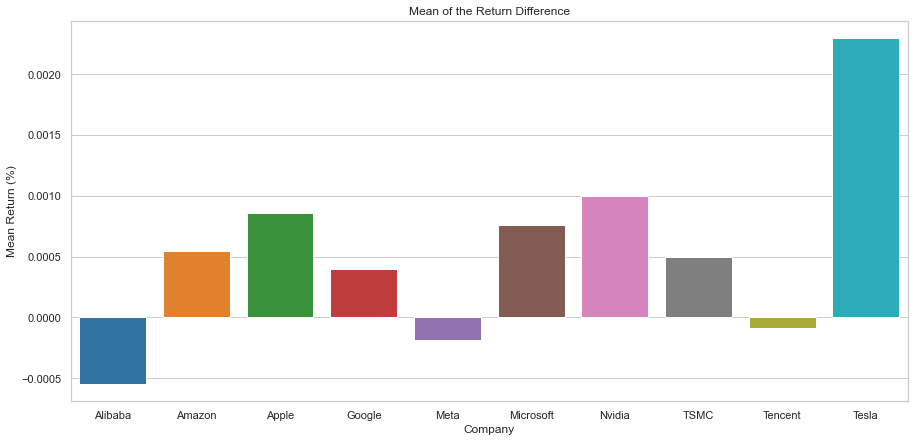

In [39]:
#Calculating the average of excess returns
avg_excess_return = excess_return.mean()

#Plot the average excess returns
sns.barplot(x=avg_excess_return.index,y=avg_excess_return.values)
plt.title('Mean of the Return Difference')
plt.ylabel('Mean Return (%)')
plt.xlabel('Company')
plt.show()

<p>It looks like there was quite a bit of a difference between average daily returns for all Companies. But, Tesla mean return its most higher.</p>

#### 2. Calculate The Standard Deviation of The *Excess Returns*

<p>Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.</p>

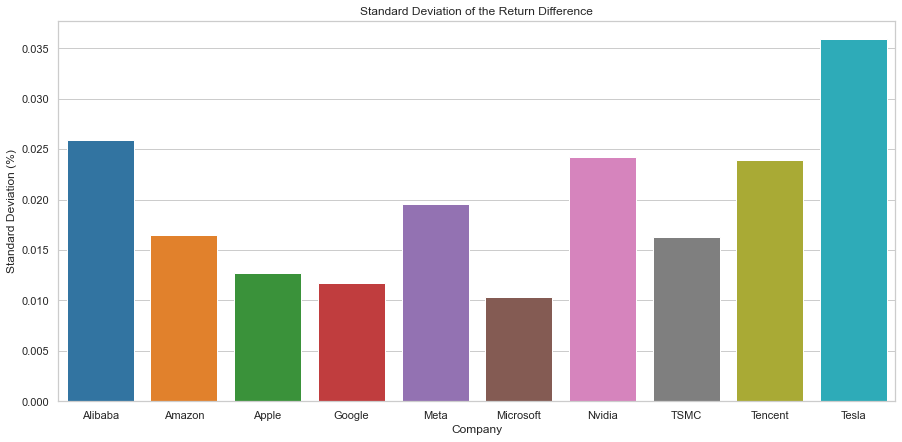

In [40]:
#Calculating the standard deviation of excess return
std_excess_return = excess_return.std()

#Plot the standard deviation of excess return
sns.barplot(x=std_excess_return.index,y=std_excess_return.values)
plt.title('Standard Deviation of the Return Difference')
plt.ylabel('Standard Deviation (%)')
plt.xlabel('Company')
plt.show()

#### 3. Calculate the Sharpe ratio
Ratio of *Average Excess Returns* and *Standard Deviation of Excess Returns*.

Indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often *annualized* by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays, for 5 years): √(252*5)

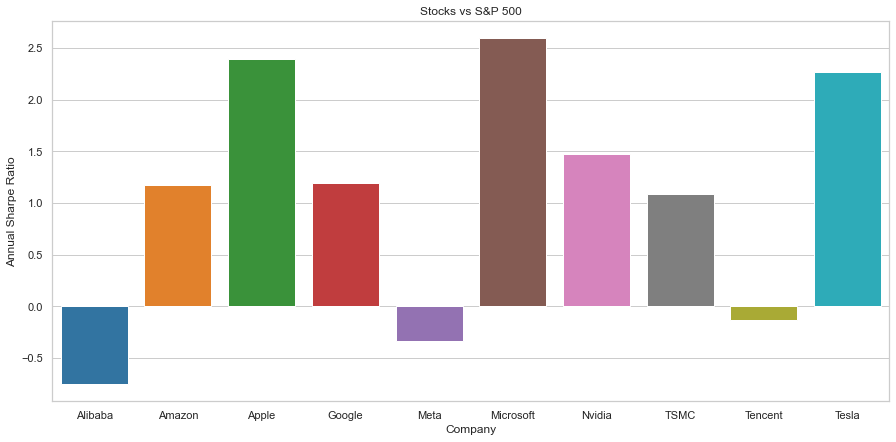

Top 3 Companies with Highest Sharpe Ratio
Company Name
Microsoft    2.595506
Apple        2.392393
Tesla        2.269232
dtype: float64


In [48]:
#Calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(std_excess_return)

#Annualize the sharpe ratio
annual_factor = np.sqrt(252*5)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

#Plot the annualized sharpe ratio 
sns.barplot(x=annual_sharpe_ratio.index,y=annual_sharpe_ratio.values)
plt.title('Stocks vs S&P 500')
plt.ylabel('Annual Sharpe Ratio')
plt.xlabel('Company')
plt.show()

#Show the top 3 sharpe ratio
top_ratio = annual_sharpe_ratio.sort_values(ascending=False)[:3]
print('Top 3 Companies with Highest Sharpe Ratio')
print(top_ratio)

### Conclusion

Since 5 years ago until now, The 3 Tech Companies above have the highest sharpe ratio among the top 10 Tech Companies in the World. This means that investments in the three companies above will yield higher returns per unit of risk. In other words, investing in 3 Tech Companies above would be more attractive.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.

# Predicting Price Stock of Companies with Highest Sharpe Ratio

In [61]:
#Slicing the company with highest sharpe ratio
topcomp = str(top_ratio.index[0])
print('Company with highest sharpe ratio: ',topcomp)

Company with highest sharpe ratio:  Microsoft


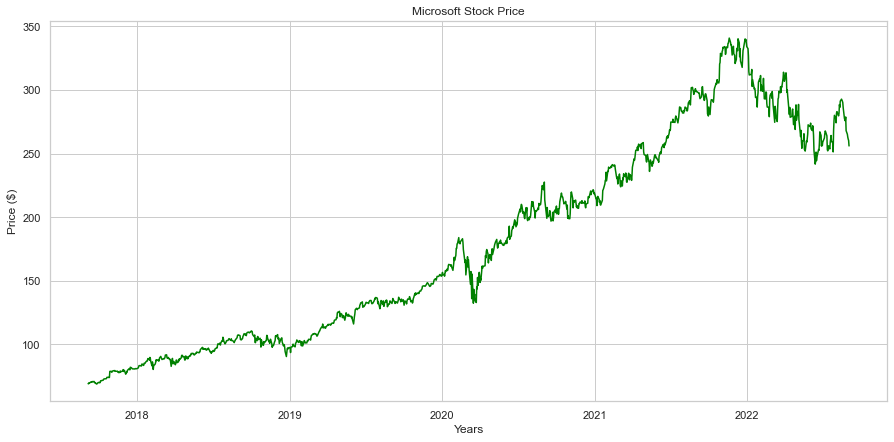

Company Name,Microsoft
Date,
2022-08-29,265.230011
2022-08-30,262.970001
2022-08-31,261.470001
2022-09-01,260.399994
2022-09-02,256.059998


In [65]:
data = stock.filter([topcomp])

sns.lineplot(x='Date',y=topcomp,data=data,color='green')
plt.title(f'{topcomp} Stock Price')
plt.ylabel('Price ($)')
plt.xlabel('Years')
plt.show()
data.tail()

# unfinish

In [82]:
ticker_code = []

for i in range(len(company_name)):
  if company_name[i] == topcomp:
    ticker_code.append(company_list[i])

data = yf.download(str(ticker_code[0]),start,end)



[*********************100%***********************]  1 of 1 completed


In [18]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
dataset

array([[ 69.1676178 ],
       [ 68.9703064 ],
       [ 69.85356903],
       ...,
       [261.47000122],
       [260.3999939 ],
       [256.05999756]])

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.20892303e-03],
       [4.83630910e-04],
       [3.73039426e-03],
       ...,
       [7.08088516e-01],
       [7.04155302e-01],
       [6.88202017e-01]])

In [20]:
train_data = scaled_data[:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [21]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-09-04 21:23:41.804292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1137/1137 [==============================] - 27s 21ms/step - loss: 0.0020


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 47ms/step


9.427813616405677

/var/folders/js/hx1c0jw17zdfth8hhz4z2n3m0000gn/T/ipykernel_3186/4007097880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


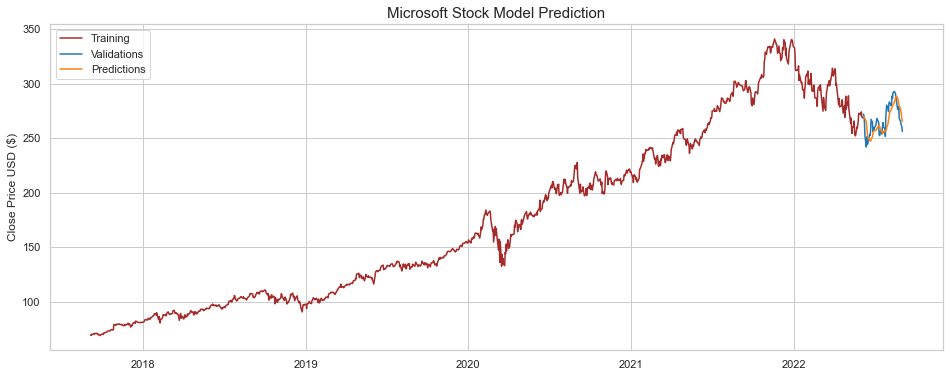

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Microsoft Stock Model Prediction',size=15)
plt.ylabel('Close Price USD ($)')
plt.plot(train['Microsoft'],color='brown')
plt.plot(valid[['Microsoft', 'Predictions']])
plt.legend(['Training', 'Validations', 'Predictions'], loc='upper left')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

Company Name,Microsoft,Predictions
Date,,
2022-06-07,271.922821,268.219360
2022-06-08,269.837250,268.629883
2022-06-09,264.229156,268.689667
2022-06-10,252.454147,267.879578
2022-06-13,241.746857,265.285400
...,...,...
2022-08-29,265.230011,276.837982
2022-08-30,262.970001,273.858643
2022-08-31,261.470001,270.783142
